<a href="https://colab.research.google.com/github/sahil-sorathiya/ml-practice/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gradient Descent for linear regression for 1 feture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

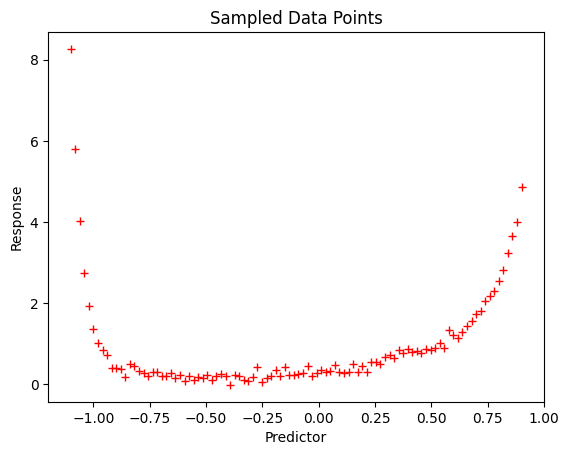

In [2]:
np.random.seed(26)
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, y = gen_data()

plt.plot(predictor, y, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()
X = np.array([[x, 1] for x in predictor])

In [3]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [4]:
def calc_gradient(X, y, y_predicted):
    n = float(len(X))
    weight_derivatives = -(2/n) * np.sum(np.dot(X.T , (y-y_predicted).reshape(y.shape[0],1)), axis=1)
    return weight_derivatives

In [5]:
def gradient_descent(X, y, iterations =1000, learning_rate = 0.01, stopping_threshold = 1e-6):
    current_weight = np.array([0.0] * X.shape[1])

    # print(X.shape)
    # print(y.shape)
    # print(current_weight.shape)

    n = float(len(X))

    previous_cost = None

    for i in range(iterations):

        y_predicted = np.sum(current_weight * X, axis=1)
        current_cost = mean_squared_error(y, y_predicted)

        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        # for j in range(len(current_weight)):
        #     weight_derivative = -(2/n) * sum(X[:, j] * (y-y_predicted))
        #     current_weight[j] = current_weight[j] - (learning_rate * weight_derivative)
        weight_derivatives = calc_gradient(X, y, y_predicted)
        current_weight = current_weight - (learning_rate * weight_derivatives)

        if (i % 100) == 0:
            print(f"Iteration {i}: Cost {current_cost}, Weight {current_weight}")

    return current_weight

estimated_weight = gradient_descent(X, y)

Iteration 0: Cost 2.57312001237861, Weight [0.00053933 0.01874877]
Iteration 100: Cost 1.6868203841584728, Weight [0.12342246 0.8222518 ]
Iteration 200: Cost 1.6573031306606754, Weight [0.23024704 0.93927873]
Iteration 300: Cost 1.6529425467283567, Weight [0.29045418 0.96131766]
Iteration 400: Cost 1.651861142108351, Weight [0.32192078 0.96771968]
Iteration 500: Cost 1.6515801997633661, Weight [0.3380791  0.97036438]


In [6]:
y_predicted = np.sum(estimated_weight * X, axis=1)

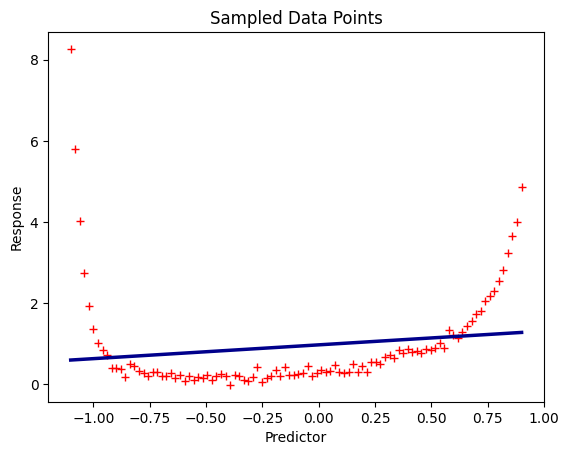

In [7]:
plt.plot(predictor, y, 'r+')
plt.plot(predictor, y_predicted,linewidth=2.5, color='darkblue')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

### Gradient Descent for Linear regression for multiple feature

In [8]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")
train_data = train_data.drop(["longitude", "latitude"], axis=1)
test_data = test_data.drop(["longitude", "latitude"], axis=1)

def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Normalize each column
train_data = train_data.apply(normalize_column)
test_data = test_data.apply(normalize_column)

train_data["bias"] = np.array([1.0] * train_data.shape[0])
test_data["bias"] = np.array([1.0] * test_data.shape[0])

train_data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bias
0,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012,1.0
1,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228,1.0
2,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775,1.0
3,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414,1.0
4,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125,1.0


In [9]:
X_train = train_data.drop(["median_house_value"], axis=1).to_numpy()
y_train = train_data["median_house_value"].to_numpy()
X_test = test_data.drop(["median_house_value"], axis=1).to_numpy()
y_test = test_data["median_house_value"].to_numpy()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17000, 7)
(17000,)
(3000, 7)
(3000,)


In [10]:
def mean_squared_error(y_true, y_predicted):

    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [11]:
def calc_gradient(X, y, y_predicted):
    n = float(len(X))
    weight_derivatives = -(2/n) * np.sum(np.dot(X.T , (y-y_predicted).reshape(y.shape[0],1)), axis=1)
    return weight_derivatives

In [12]:
def gradient_descent(X, y, iterations=1000, learning_rate=0.001, stopping_threshold=1e-06):
    W = np.array([0.0] * X.shape[1])
    print(W.shape)

    previous_weights = None

    for i in range(iterations):

        y_predicted = np.sum(X * W, axis=1)
        current_cost = mean_squared_error(y, y_predicted)
        previous_cost = None

        if previous_cost and abs(previous_cost - current_cost) < stopping_threshold:
            break
        previous_weights = W
        weight_derivatives = calc_gradient(X, y, y_predicted)
        W = W - (learning_rate * weight_derivatives)

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost {current_cost}, Weight {W}")

    return W

W = gradient_descent(X_train, y_train, iterations=5000, learning_rate=0.05)
print()
W

(7,)
Iteration 0: Cost 0.2143949489259579, Weight [0.02207927 0.00294107 0.00338443 0.00156391 0.00335386 0.01142959
 0.03964972]
Iteration 1000: Cost 0.028352963670760768, Weight [ 0.16694243  0.09118989  0.08353944 -0.01893692  0.08829249  1.04406148
  0.04406114]
Iteration 2000: Cost 0.027132139662160628, Weight [ 0.20223331  0.08747925  0.13944414 -0.0519414   0.1400903   1.24124538
 -0.02939599]
Iteration 3000: Cost 0.026963237562473947, Weight [ 0.21237813  0.06131634  0.18396363 -0.08941156  0.17881618  1.28553443
 -0.049052  ]
Iteration 4000: Cost 0.026857877828944415, Weight [ 0.21529067  0.02667085  0.22012451 -0.12967138  0.20906562  1.29786441
 -0.05505819]



array([ 0.21599402, -0.01066757,  0.25196048, -0.17078603,  0.23512141,
        1.30329676, -0.05728498])

In [13]:
y_test_pred = np.sum(W * X_test, axis = 1)

cost = mean_squared_error(y_test, y_test_pred)

cost

0.027265669848200665